In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats as stats
from scipy.stats import norm

In [25]:
# References
# 1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html


# https://onlinecourses.science.psu.edu/stat501/node/321

Action:
    1. Apply a log transformation to the dependent variable SalePrice.

In [4]:
#loading data
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [13]:
y = train[['SalePrice']]
y.head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [16]:
y.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


Visually we can see that the dependent variable has a skewed distribution, and "feels" more peaked than a normal distribution. We can use the Jarque Bera test to check for normality. Scipy has a built in test for normality as well which uses the D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. [1]

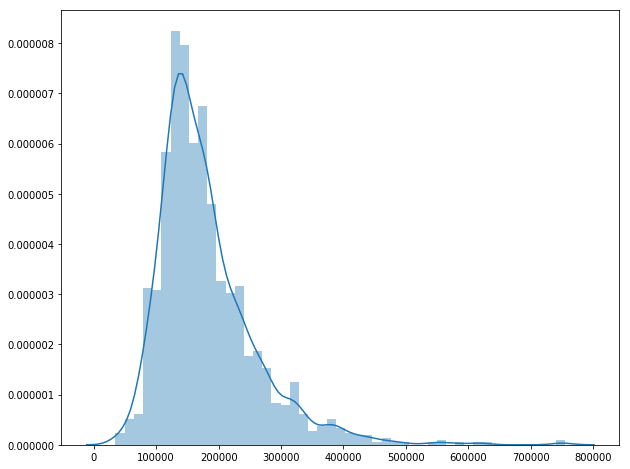

In [17]:

sns.distplot(y)

In [27]:
# Recall null hypothesis is that distribution is normally distributed.
_, p_value = stats.jarque_bera(y)
print("P-value {} less than 0.05 means we can reject the null hypothesis.".format(p_value))

P-value 0.0 less than 0.05 means we can reject the null hypothesis.


In [24]:
_, p_value = stats.normaltest(y)
print("P-value: {}".format(p_value))

P-value: [  2.28384835e-133]


In [28]:
# A skew value > 0 indicates more weight in the right side of the tail. This is consistent with the visualization.
stats.skew(y)

array([ 1.88094075])

In [38]:
# We also know that the mean, median, mode of a normal distribution is equal.
# Knowing the distribution is right skewed, lets confirm that the mode < median < mean
print("Mode: {}, Median: {}, Mean: {}".format(stats.mode(y)[0][0][0], np.median(y), np.mean(y)[0]))

Mode: 140000, Median: 163000.0, Mean: 180921.19589041095


Apply log transformation to SalePrice.

In [39]:
y_log = np.log(y)

P-value: 5.166596039885007e-10
Mode: 11.8494, Median: 12.0015, Mean: 12.0241


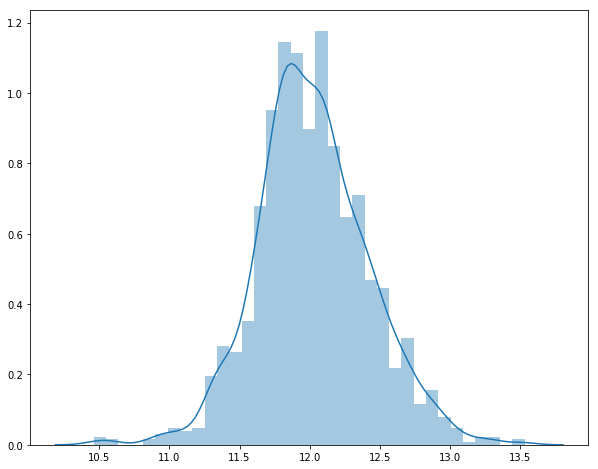

In [48]:
# Visually the distribution of the log transformation appears normal.
_, p_value = stats.jarque_bera(y_log)
# The resulting p-value allows us to reject the null hypothesis.
print("P-value: {}".format(p_value))
print("Mode: {:0.4f}, Median: {:0.4f}, Mean: {:0.4f}".format(
    stats.mode(y_log)[0][0][0], np.median(y_log), np.mean(y_log)[0])
)
sns.distplot(y_log)